In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#Correlation Matrix Visualisation
import seaborn as sns

#Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Get the path to the desktop folder
desktop_path = os.path.expanduser('~/Desktop/New folder/2045-With all assignement fields')

# Construct the full file path
OPOD_path = os.path.join(desktop_path, 'OP Total OD.xlsx')
TAZ_path = os.path.join(desktop_path, 'TAZ.xlsx')



In [3]:

# Load matrix from Excel sheet (Orig-destination matrix)
matrix_df = pd.read_excel(PMOD_path, sheet_name='Total')

# Load population and employment data from another Excel sheet
pop_emp_df = pd.read_excel(TAZ_path, sheet_name='Sheet1')

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no stylesheet, using openpyxl's defaults
  warn("Workbook contains no stylesheet, using openpyxl's defaults")


In [4]:
# Convert cell values to floats
matrix_df = matrix_df.apply(pd.to_numeric, errors='coerce')

# Replace '--' values with 0
matrix_df = matrix_df.fillna(0)

In [5]:

# Calculate the sum of rows in the OD matrix
matrix_df['ODTotal'] = matrix_df.drop('Origins', axis=1).sum(axis=1)

In [6]:
for row in matrix_df:
    for cell in row:
        value_type = type(cell)
        print(f"Value: {cell}, Type: {value_type}")

Value: O, Type: <class 'str'>
Value: r, Type: <class 'str'>
Value: i, Type: <class 'str'>
Value: g, Type: <class 'str'>
Value: i, Type: <class 'str'>
Value: n, Type: <class 'str'>
Value: s, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 4, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 6, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 7, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 9, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 1, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: 1, 

In [7]:
matrix_df

,Origins,1001,1004,1006,1007,1009,1011,1012,1013,1014,...,49040,49041,49042,49043,49044,49045,49046,49047,49048,ODTotal
0,1001,0.000000,26.291206,131.786865,2.020913,3.354639,19.040985,8.042128,3.007087,0.451658,...,7.785666,0.016151,0.071294,0.125056,0.184763,0.160849,0.416326,0.029531,0.024978,782.390643
1,1004,26.467638,0.000000,145.525177,5.466972,2.845869,13.076933,7.820404,3.003938,0.370244,...,5.720157,0.009390,0.059556,0.099615,0.297951,0.117745,0.352677,0.024210,0.018941,656.596298
2,1006,159.627747,173.906418,0.000000,16.671291,5.585811,96.915215,47.287186,14.955777,1.045054,...,13.709662,0.045075,0.160908,0.251614,0.663208,0.328918,1.279063,0.078167,0.039962,1580.070726
3,1007,2.207807,6.626626,16.660845,0.000000,0.544196,7.839008,15.139743,10.898430,1.326899,...,2.637788,0.021440,0.040668,0.070397,0.215916,0.097404,0.425393,0.022245,0.005727,245.841116
4,1009,3.719480,3.020365,5.685319,0.533669,0.000000,8.772017,8.187675,2.278309,0.422760,...,45.959866,0.024023,0.069152,0.098032,0.186562,0.123793,0.402435,0.028244,0.205451,995.795720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,49044,0.171608,0.286307,0.620754,0.194431,0.168822,0.363017,1.994650,1.193995,3.630352,...,1.387274,0.010231,0.030924,0.048896,0.000000,11.016551,0.141428,0.015706,0.005124,428.163792
5348,49045,0.167733,0.123532,0.336468,0.096734,0.125663,0.296073,1.302157,0.805002,0.372009,...,1.129062,0.009736,0.022349,0.037549,11.879191,0.000000,0.203204,0.012545,0.003311,213.919266
5349,49046,0.399667,0.336260,1.190580,0.382130,0.368877,1.189700,4.587405,2.020641,0.533565,...,3.473931,3.859343,1.296692,2.859764,0.147854,0.185177,0.000000,5.708926,0.013002,1726.472294
5350,49047,0.029513,0.024073,0.075947,0.020917,0.026663,0.070843,0.273823,0.110076,0.031563,...,0.252921,0.153428,0.137819,0.282821,0.016687,0.011871,5.159034,0.000000,0.000717,185.861200


In [8]:
pop_emp_df

,ID,Area,TAZ,COUNTY,COUNTY_CODE,ADJACENT_COUNTY,Land_Area,Water_Area,Total_Area,TAD10,...,2036 POP,2036 Basic,2036 Retail,2036 Service,2045 HHOLD,2045 POP,2045 Basic,2045 Retail,2045 Service,Unnamed: 39
0,4915,16.765556,42001,Ellis,139.0,NaN,16.750978,0.002328,16.753306,7.208340e+15,...,1527,444,30,269,545,59371,2646,49,689,3384
1,5291,41.615955,42005,Ellis,139.0,NaN,41.295078,0.289960,41.585038,7.208340e+15,...,1184,702,0,50,452,48357,4857,469,6274,11600
2,5339,1.194887,21044,External,NaN,Ellis,1.194017,0.000873,1.194890,NaN,...,0,0,0,0,0,45253,4182,201,8184,12567
3,5084,21.771454,18076,Kaufman,257.0,NaN,21.602233,0.152763,21.754996,7.208340e+15,...,943,63,5,268,381,43529,444,30,271,745
4,5292,21.466690,17100,Ellis,139.0,NaN,21.374513,0.075937,21.450450,7.208340e+15,...,231,13,0,7,95,38869,287,50,1598,1935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,5365,1.039986,21018,External,NaN,Hunt,1.039324,0.000661,1.039985,NaN,...,0,0,0,0,0,0,0,0,0,0
5348,5259,3.628747,20004,Hunt,231.0,NaN,3.410847,0.215542,3.626389,7.208340e+15,...,619,137,21,178,232,0,0,0,0,0
5349,5263,1.345450,20001,Hunt,231.0,NaN,1.129716,0.214874,1.344590,7.208340e+15,...,185,1,0,7,63,0,0,0,0,0
5350,5279,0.639569,20016,Hunt,231.0,NaN,0.609337,0.029795,0.639132,7.208340e+15,...,207,2,0,29,71,0,0,0,0,0


In [9]:
print(pop_emp_df.dtypes)

ID                   int64
Area               float64
TAZ                  int64
COUNTY              object
COUNTY_CODE        float64
ADJACENT_COUNTY     object
Land_Area          float64
Water_Area         float64
Total_Area         float64
TAD10              float64
TRACT_GEOID10      float64
BG_GEOID10         float64
NonDowntownAM        int64
NonDowntownOP        int64
MPA9                 int64
MPA12               object
Airport             object
External             int64
CBD                  int64
2023 HHOLD           int64
2023 POP             int64
2023 Basic           int64
2023 Retail          int64
2023 Service         int64
2026 HHOLD           int64
2026 POP             int64
2026 Basic           int64
2026 Retail          int64
2026 Service         int64
2036 HHOLD           int64
2036 POP             int64
2036 Basic           int64
2036 Retail          int64
2036 Service         int64
2045 HHOLD           int64
2045 POP             int64
2045 Basic           int64
2

In [10]:
print(matrix_df.columns)

Index(['Origins', '1001', '1004', '1006', '1007', '1009', '1011', '1012',
       '1013', '1014',
       ...
       '49040', '49041', '49042', '49043', '49044', '49045', '49046', '49047',
       '49048', 'ODTotal'],
      dtype='object', length=5354)


In [19]:
#New dataframe with only origins and OD table
reg_2045_df=matrix_df.iloc[:,[0,-1]]

In [20]:
reg_2045_df

,Origins,ODTotal
0,1001,782.390643
1,1004,656.596298
2,1006,1580.070726
3,1007,245.841116
4,1009,995.795720
...,...,...
5347,49044,428.163792
5348,49045,213.919266
5349,49046,1726.472294
5350,49047,185.861200


In [21]:
#List the columns selected to be appended to the reg_2045_df dataframe
selected_col_pop_emp_df=["TAZ","Area","2045 HHOLD","2045 POP","2045 Basic","2045 Retail","2045 Service"]

In [22]:
# Merge based on "Origins" in data_df and "TAZ" in other_df
reg_2045_df = reg_2045_df.merge(pop_emp_df[selected_col_pop_emp_df], left_on="Origins", right_on="TAZ", how="left")


In [23]:
reg_2045_df

,Origins,ODTotal,TAZ,Area,2045 HHOLD,2045 POP,2045 Basic,2045 Retail,2045 Service
0,1001,782.390643,1001,10.214340,245,5675,2179,238,2160
1,1004,656.596298,1004,1.635124,216,5733,123,12,913
2,1006,1580.070726,1006,8.540456,289,5757,141,76,1165
3,1007,245.841116,1007,12.631117,25,5701,1,73,275
4,1009,995.795720,1009,2.558288,140,3638,77,56,283
...,...,...,...,...,...,...,...,...,...
5347,49044,428.163792,49044,21.368008,235,1172,69,50,660
5348,49045,213.919266,49045,10.720568,16,3147,173,6,364
5349,49046,1726.472294,49046,10.383058,671,1168,100,965,2678
5350,49047,185.861200,49047,7.469014,70,1167,252,74,1414


In [24]:
#Check for merged right
row_1001 = pop_emp_df[pop_emp_df['TAZ'] == 1001]
row_1001

reg_2045_df.columns

Index(['Origins', 'ODTotal', 'TAZ', 'Area', '2045 HHOLD', '2045 POP',
       '2045 Basic', '2045 Retail', '2045 Service'],
      dtype='object')

In [25]:
#Select variables for linear regression
independent_variable = reg_2045_df[['Area', '2045 HHOLD', '2045 POP','2045 Basic', '2045 Retail', '2045 Service']]
dependent_variable = reg_2045_df['ODTotal']

In [26]:
independent_variable 


,Area,2045 HHOLD,2045 POP,2045 Basic,2045 Retail,2045 Service
0,10.214340,245,5675,2179,238,2160
1,1.635124,216,5733,123,12,913
2,8.540456,289,5757,141,76,1165
3,12.631117,25,5701,1,73,275
4,2.558288,140,3638,77,56,283
...,...,...,...,...,...,...
5347,21.368008,235,1172,69,50,660
5348,10.720568,16,3147,173,6,364
5349,10.383058,671,1168,100,965,2678
5350,7.469014,70,1167,252,74,1414


In [27]:
dependent_variable

0        782.390643
1        656.596298
2       1580.070726
3        245.841116
4        995.795720
           ...     
5347     428.163792
5348     213.919266
5349    1726.472294
5350     185.861200
5351      20.639210
Name: ODTotal, Length: 5352, dtype: float64

## Multi Linear Regression

                            OLS Regression Results                            
Dep. Variable:                ODTotal   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     197.1
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.26e-227
Time:                        11:20:01   Log-Likelihood:                -52136.
No. Observations:                5352   AIC:                         1.043e+05
Df Residuals:                    5345   BIC:                         1.043e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2408.5523     84.094     28.641   

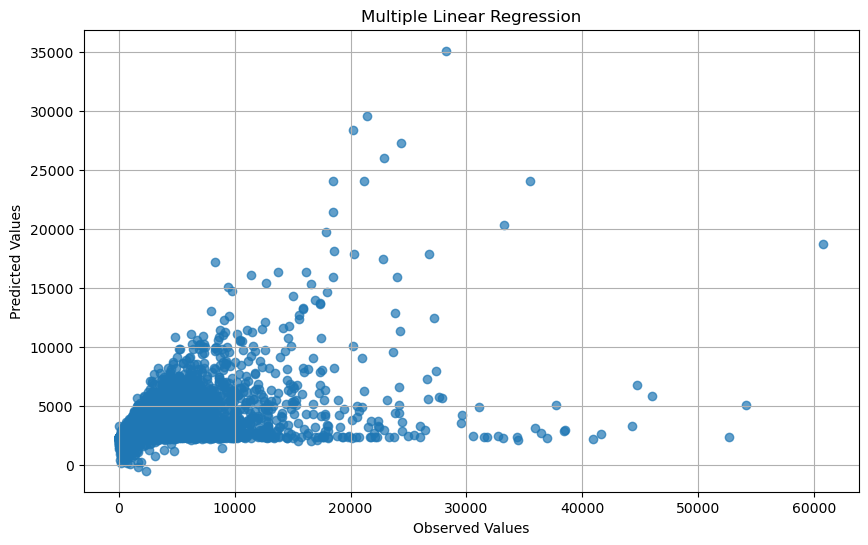

In [33]:
# Add a constant term to the independent variables
independent_variable = sm.add_constant(independent_variable)

# Fit the multiple linear regression model
model = sm.OLS(dependent_variable, independent_variable).fit()

# Print the regression summary
print(model.summary())

# Plot the regression lines
plt.figure(figsize=(10, 6))

plt.scatter(dependent_variable, model.predict(independent_variable), alpha=0.7)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression')
plt.grid(True)
plt.show()

In [34]:
equation = f'ODTotal = {model.params[0]} + {model.params[1]} * Area + {model.params[2]} * 2045 HHOLD+ {model.params[3]} * 2045 POP+ {model.params[4]} * 2045 Basic+ {model.params[5]} * 2045 Retail+ {model.params[6]} * 2045 Service'

In [35]:
print("Equation of the Regression Plane:")
print(equation)

Equation of the Regression Plane:
ODTotal = 2408.552314271367 + -60.23520960586204 * Area + 1.8982260584565211 * 2045 HHOLD+ -0.015915532894233225 * 2045 POP+ 0.09965871159169089 * 2045 Basic+ -0.19847684936765972 * 2045 Retail+ -0.016103785507065677 * 2045 Service


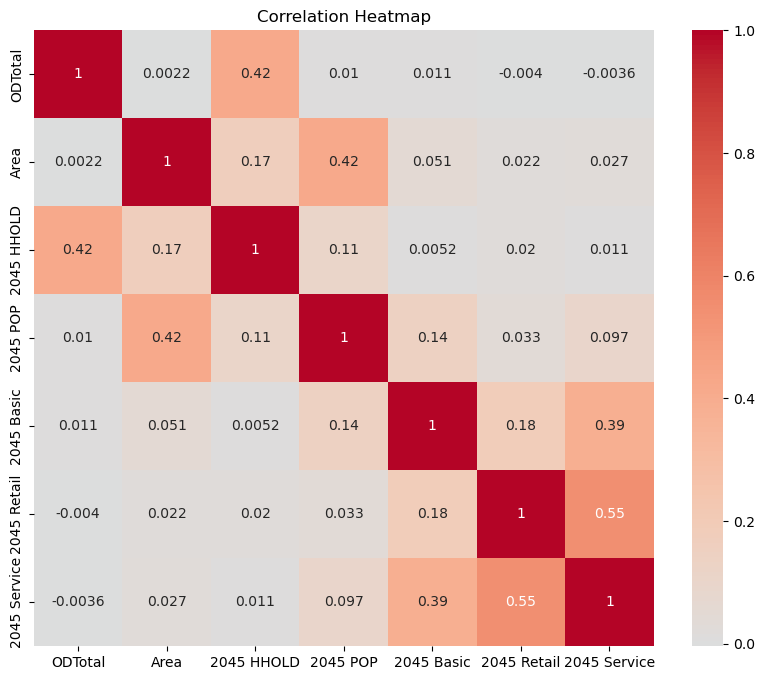

In [38]:
# Select the columns for correlation analysis
columns_of_interest = ['ODTotal', 'Area', '2045 HHOLD', '2045 POP','2045 Basic', '2045 Retail', '2045 Service']

# Compute the correlation matrix for selected columns
correlation_matrix = reg_2045_df[columns_of_interest].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Decison Tree

Mean Squared Error: 31576121.86467791


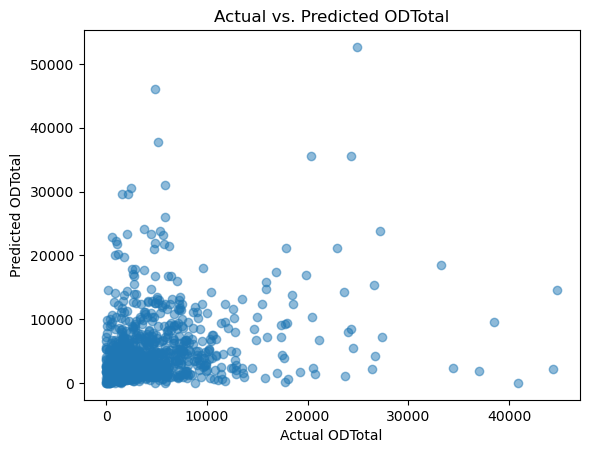

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_variable,dependent_variable, test_size=0.25, random_state=42)

# Create a DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_regressor.fit(X_train, y_train)

# Predict using the model
y_pred = tree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual ODTotal')
plt.ylabel('Predicted ODTotal')
plt.title('Actual vs. Predicted ODTotal')
plt.show()

In [59]:
# Calculate the range of the dependent variable
target_range = dependent_variable.max() - dependent_variable.min()

# Calculate the RMSE
rmse = np.sqrt(mse)

# Normalize the RMSE
normalized_rmse = rmse / target_range

print(f"RMSE: {rmse}")
print(f"Normalized RMSE: {normalized_rmse}")

RMSE: 5619.263462828372
Normalized RMSE: 0.09238124733980992


#### Normalized RMSE indicate that the model accounts for only 9.23% of the variablity

## Random Forest

In [72]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_variable,dependent_variable, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=3, random_state=42)

# Train the model
random_forest_regressor.fit(X_train, y_train)

# Predict using the model
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 20326887.946341336


In [73]:
# Calculate the range of the dependent variable
target_range = dependent_variable.max() - dependent_variable.min()

# Calculate the RMSE
rmse = np.sqrt(mse)

# Normalize the RMSE
normalized_rmse = rmse / target_range

print(f"RMSE: {rmse}")
print(f"Normalized RMSE: {normalized_rmse}")

RMSE: 4508.535011102978
Normalized RMSE: 0.07412076168987025


# Make predictions using the trained model
predicted_values = random_forest_regressor.predict(X_new)